In [1]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#occ_names = import_occupations('data_new/occupations_subset.csv').flatten()
occ_list = import_occupations('data/occupations_removed.csv')
occ_names = occ_list[:,0]
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']

In [3]:
for model in models:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = evaluate_predictions(model, occ_names, path)

Make average ppbs happen

In [4]:
path = 'data/roberta-base_prediction_evaluation_all.csv'
occupation_data = pd.read_csv(path, index_col=0)
occupation_data_all = occupation_data.drop(["she_p", "he_p", "ppbs"], axis=1)
occupation_data_all["ppbs average"] = 0
print(occupation_data_all)

            occupation  ppbs average
0     registered_nurse             0
1                nurse             0
2          housekeeper             0
3         receptionist             0
4     fashion_designer             0
5                nanny             0
6               dancer             0
7            violinist             0
8               singer             0
9               warden             0
10           geologist             0
11          cartoonist             0
12   athletic_director             0
13               coach             0
14            gangster             0
15             skipper             0
16            lyricist             0
17           trumpeter             0
18             senator             0
19       civil_servant             0
20               boxer             0
21         stockbroker             0
22       mathematician             0
23              cleric             0
24        sportswriter             0
25            wrestler             0
2

In [5]:
for model in models:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    col = occupation_data["ppbs"]
    occupation_data_all["ppbs average"] = occupation_data_all["ppbs average"] + col
occupation_data_all["ppbs average"] = occupation_data_all["ppbs average"] / 4
print(occupation_data_all)


            occupation  ppbs average
0     registered_nurse     -0.862838
1                nurse     -0.825202
2          housekeeper     -0.800566
3         receptionist     -0.506405
4     fashion_designer     -0.338018
5                nanny     -0.872716
6               dancer     -0.315881
7            violinist      0.187475
8               singer     -0.136420
9               warden      0.624356
10           geologist      0.565643
11          cartoonist      0.682966
12   athletic_director      0.696068
13               coach      0.718045
14            gangster      0.913093
15             skipper      0.679008
16            lyricist      0.508166
17           trumpeter      0.823161
18             senator      0.505487
19       civil_servant      0.377642
20               boxer      0.870969
21         stockbroker      0.813211
22       mathematician      0.591013
23              cleric      0.690560
24        sportswriter      0.734075
25            wrestler      0.783290
2

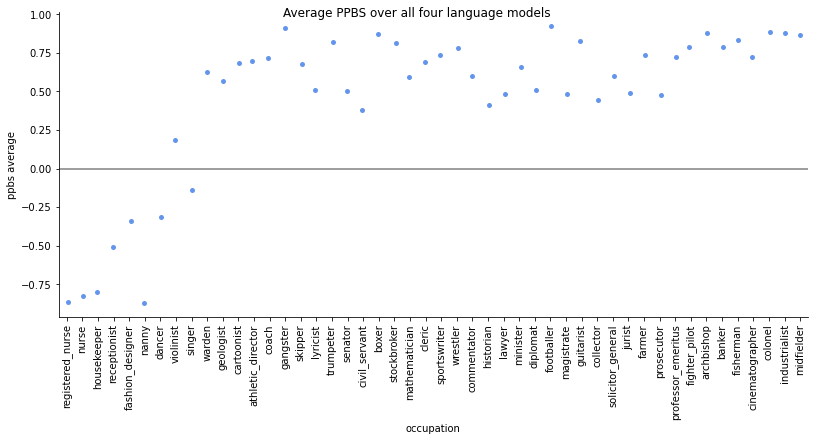

In [6]:
graph = sns.catplot(data=occupation_data_all, x='occupation', y='ppbs average', aspect = 7/3, color='cornflowerblue')
graph.refline(y=0, linestyle='solid')
graph.fig.suptitle("Average PPBS over all four language models")
plt.xticks(rotation=90)
plt.show()

In [7]:
occ_trs = pd.read_csv('data/occupations_reduced.csv').to_numpy().flatten()
subset_df = pd.DataFrame(columns=['occupation', 'ppbs average'])
for occ in occ_trs:
    if occ in occupation_data_all['occupation'].to_numpy().flatten():
        subset_df = subset_df.append({'occupation' : occ, 'ppbs average' : occupation_data_all.loc[occupation_data_all['occupation'] == occ, 'ppbs average'].to_numpy().flatten()[0]}, ignore_index=True)
print(subset_df.sort_values(by=['ppbs average']))

          occupation  ppbs average
4              nurse     -0.825202
0   fashion_designer     -0.338018
11            dancer     -0.315881
23            singer     -0.136420
7          violinist      0.187475
16     civil_servant      0.377642
21         historian      0.414284
3         magistrate      0.480723
22            lawyer      0.486723
18            jurist      0.487336
9           lyricist      0.508166
20          diplomat      0.508299
8          geologist      0.565643
17     mathematician      0.591013
2         cartoonist      0.682966
5              coach      0.718045
10   cinematographer      0.724028
14            farmer      0.738451
6           wrestler      0.783290
12            banker      0.790067
15         guitarist      0.827887
13             boxer      0.870969
1      industrialist      0.879309
19        footballer      0.925761


C:\Users\sophi\AppData\Local\Temp\ipykernel_27816\1160667912.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_df = subset_df.append({'occupation' : occ, 'ppbs average' : occupation_data_all.loc[occupation_data_all['occupation'] == occ, 'ppbs average'].to_numpy().flatten()[0]}, ignore_index=True)
C:\Users\sophi\AppData\Local\Temp\ipykernel_27816\1160667912.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset_df = subset_df.append({'occupation' : occ, 'ppbs average' : occupation_data_all.loc[occupation_data_all['occupation'] == occ, 'ppbs average'].to_numpy().flatten()[0]}, ignore_index=True)
C:\Users\sophi\AppData\Local\Temp\ipykernel_27816\1160667912.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subset

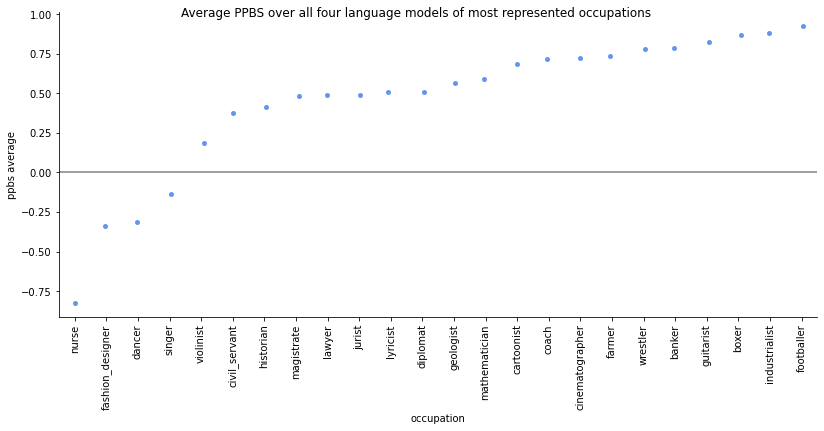

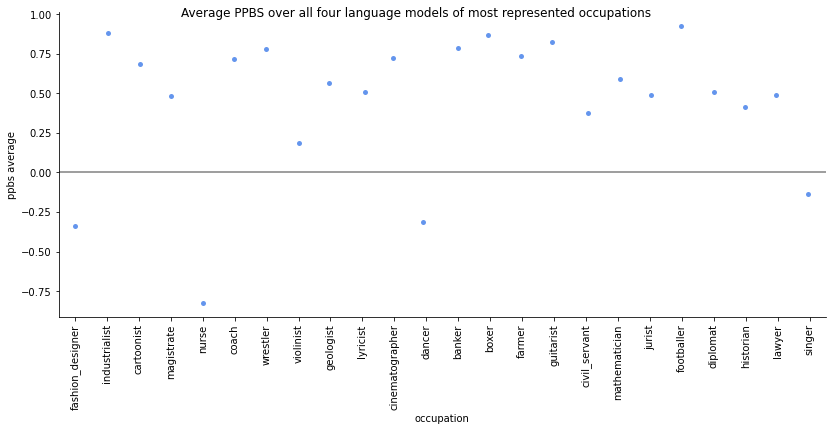

In [8]:
graph = sns.catplot(data=subset_df.sort_values(by=['ppbs average']), x='occupation', y='ppbs average', aspect = 7/3, color='cornflowerblue')
graph.refline(y=0, linestyle='solid')
graph.fig.suptitle("Average PPBS over all four language models of most represented occupations")
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=subset_df, x='occupation', y='ppbs average', aspect = 7/3, color='cornflowerblue')
graph.refline(y=0, linestyle='solid')
graph.fig.suptitle("Average PPBS over all four language models of most represented occupations")
plt.xticks(rotation=90)
plt.show()

## Using seaborn for plotting the PPBS

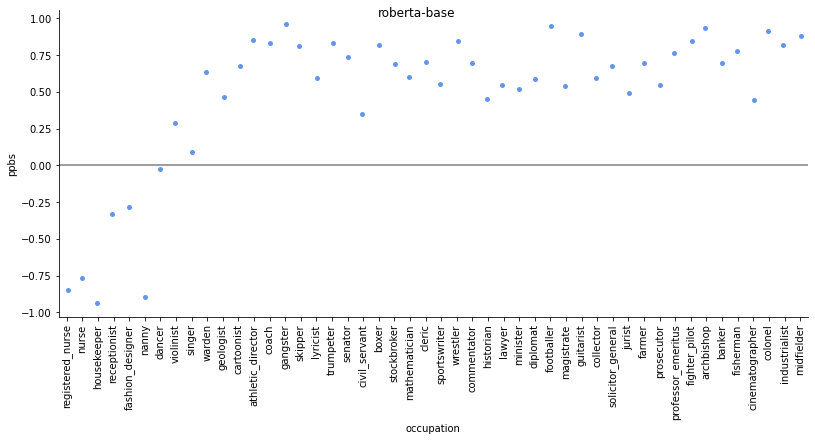

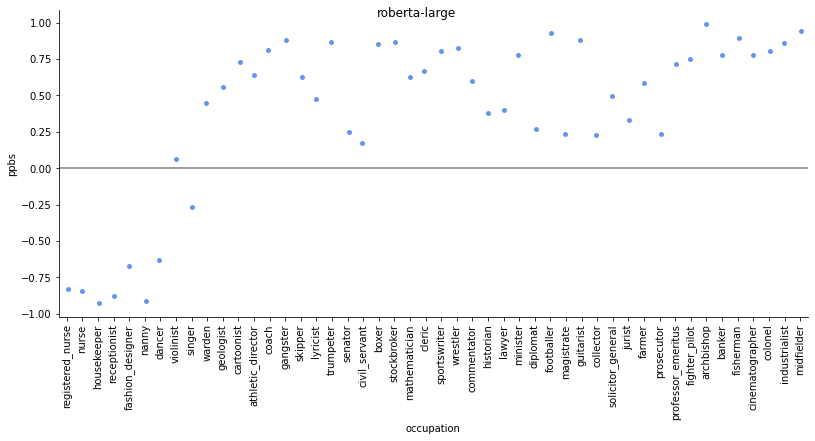

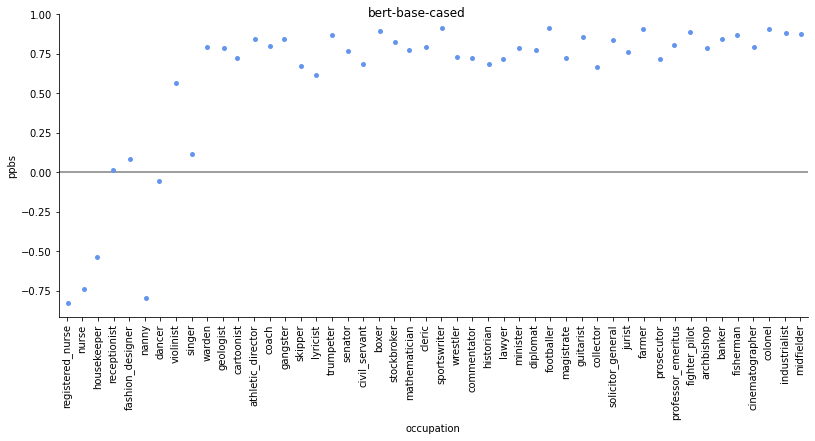

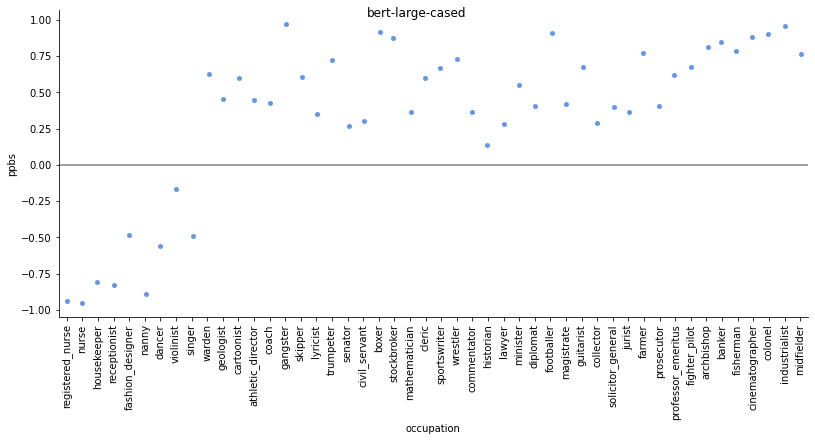

In [9]:
for model in models:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = pd.read_csv(path)
    graph = sns.catplot(data=occupation_data, x='occupation', y='ppbs', aspect = 7/3, color='cornflowerblue')
    graph.refline(y=0, linestyle='solid')
    graph.fig.suptitle(model)
    plt.xticks(rotation=90)
    plt.show()

Display all models in the same plot by concatenating their dataframes and use seaborn.

In [11]:
models_roberta = ['roberta-base', 'roberta-large']
models_bert = ['bert-base-cased', 'bert-large-cased']

data_roberta = pd.DataFrame()
for model in models_roberta:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data_roberta = pd.concat([data_roberta, occupation_data], ignore_index=True)

data_bert = pd.DataFrame()
for model in models_bert:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data_bert = pd.concat([data_bert, occupation_data], ignore_index=True)
    
data = pd.DataFrame()
for model in models:
    path = 'data/' + model + '_prediction_evaluation_all.csv'
    occupation_data = pd.read_csv(path, index_col=0)
    occupation_data['model'] = model
    data = pd.concat([data, occupation_data], ignore_index=True)

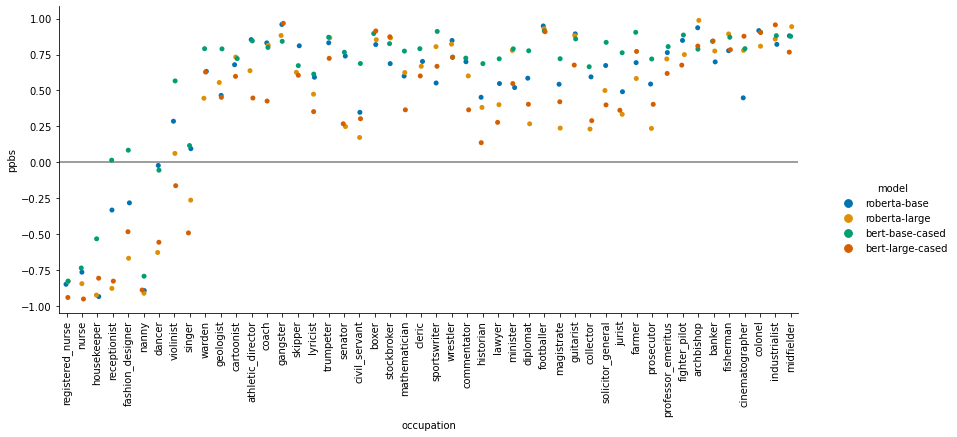

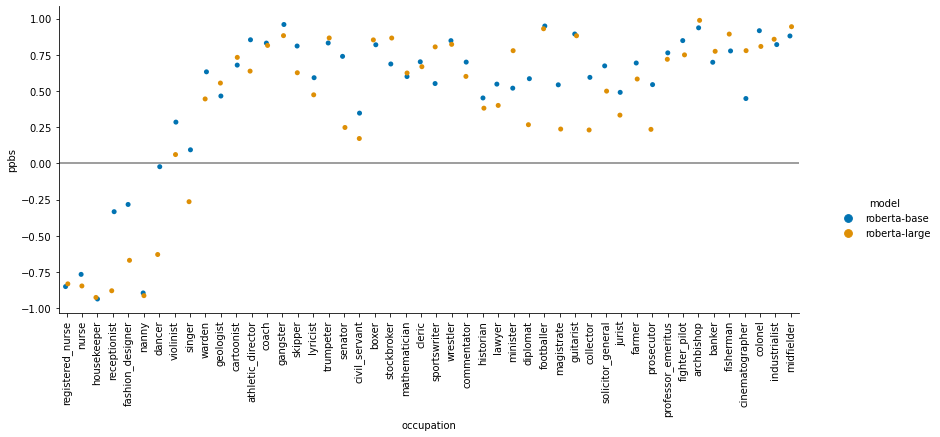

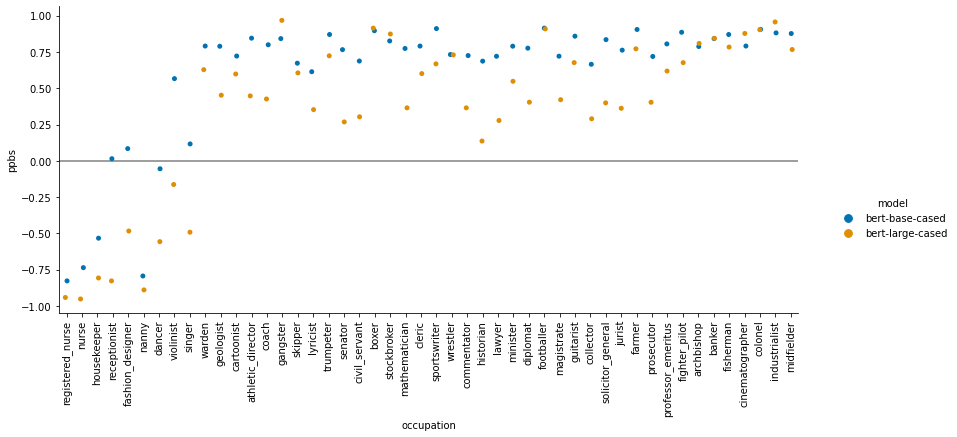

In [12]:
graph = sns.catplot(data=data, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_roberta, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()
graph = sns.catplot(data=data_bert, x='occupation', y='ppbs', aspect=7/3, hue='model', palette='colorblind')
graph.refline(y=0, linestyle='solid')
plt.xticks(rotation=90)
plt.show()

In [13]:
path = 'data/bert-base-cased_prediction_evaluation_all.csv'
print(pd.read_csv(path, index_col=0))

            occupation     she_p      he_p      ppbs
0     registered_nurse  0.913927  0.086073 -0.827853
1                nurse  0.868266  0.131734 -0.736532
2          housekeeper  0.766718  0.233282 -0.533437
3         receptionist  0.492822  0.507178  0.014356
4     fashion_designer  0.458043  0.541957  0.083914
5                nanny  0.896983  0.103017 -0.793966
6               dancer  0.527590  0.472410 -0.055180
7            violinist  0.216872  0.783128  0.566256
8               singer  0.441906  0.558094  0.116189
9               warden  0.104528  0.895472  0.790944
10           geologist  0.105293  0.894707  0.789415
11          cartoonist  0.139035  0.860965  0.721931
12   athletic_director  0.077416  0.922584  0.845167
13               coach  0.100124  0.899876  0.799752
14            gangster  0.078943  0.921057  0.842114
15             skipper  0.163618  0.836382  0.672763
16            lyricist  0.193049  0.806951  0.613902
17           trumpeter  0.064777  0.935223  0.